![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [38]:
import csv
from IPython.display import display
import numpy as np

In [39]:
raw_data = []

with open('titanic.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        raw_data.append(row)

In [40]:
def data_list_summary(data = raw_data):
    print("The type of this dataset is: " + str(type(data)))
    print("The length of this dataset is: " + str(len(data)))
    print("The length of an entry in this dataset is: " + str(len(data[0])))
    print("The first three entries in this dataset are: " + str(data[0:3]))
data_list_summary()

The type of this dataset is: <class 'list'>
The length of this dataset is: 892
The length of an entry in this dataset is: 12
The first three entries in this dataset are: [['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], ['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']]


# 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [41]:
# Your code here
header = raw_data[0]
data = raw_data[1::]
print(data[0])
new_pd = []
def try_float(string): #Encapsulates a try-except in an expression.
    try: x = float(string)
    except: x = string
    return x
data = [list([try_float(k) for k in i]) for i in data]
print(data[0])

['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
[1.0, 0.0, 3.0, 'Braund, Mr. Owen Harris', 'male', 22.0, 1.0, 0.0, 'A/5 21171', 7.25, '', 'S']


# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

In [42]:
data_dict = {}
for j in data:
    data_dict[j[0]] = {}
    for i in range(0, len(j)):
        data_dict[j[0]][header[i]] = j[i]
print(data_dict[1])

{'PassengerId': 1.0, 'Survived': 0.0, 'Pclass': 3.0, 'Name': 'Braund, Mr. Owen Harris', 'Sex': 'male', 'Age': 22.0, 'SibSp': 1.0, 'Parch': 0.0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': '', 'Embarked': 'S'}


# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [43]:
# Your code here
data_dict_comp = {j[0]:{header[i]:j[i] for i in range(0,len(j))} for j in data}

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [44]:
import numpy as np

In [45]:
data_dict_columns = {j:np.array([data_dict[i][j] for i in data_dict]) for j in header}
print(data_dict_columns['PassengerId'][0:3])
print(data_dict_columns['Age'][0:3])
for i in data_dict_columns.keys():
    print(type(data_dict_columns[i][0]))
    print(data_dict_columns[i][0])

[ 1.  2.  3.]
['22.0' '38.0' '26.0']
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
3.0
<class 'numpy.str_'>
Braund, Mr. Owen Harris
<class 'numpy.str_'>
male
<class 'numpy.str_'>
22.0
<class 'numpy.float64'>
1.0
<class 'numpy.float64'>
0.0
<class 'numpy.str_'>
A/5 21171
<class 'numpy.float64'>
7.25
<class 'numpy.str_'>

<class 'numpy.str_'>
S


# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

| Column  | Type | What I Think |
|---------|:----:|--------------|
| PassID  | Float| Integer?     |
|Survived | Float| Boolean      |
| PClass  | Float| Categor.Int(but float is okay)  |
| Name    | Str  | String       |
| Sex     | Str  | String/Bool  |
| Age     | Str  | Float        |
| SibSp   | Float| Int          |
| Parch   | Float| Int          |
| Ticket  | Str  | String       |
| Fare    | Float| Float        |
| Cabin   | Str  | String/Int   |
| Embarked| Str  | String       |

# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transform the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [46]:
x = np.array(["1.0", "2.0", "3.0"])
print(x)
x = x.astype(float)
print(x)
x

['1.0' '2.0' '3.0']
[ 1.  2.  3.]


array([ 1.,  2.,  3.])

In [47]:
for i in data_dict_columns:
    print(i)
    print(data_dict_columns[i][0:20])

PassengerId
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.]
Survived
[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.
  0.  1.]
Pclass
[ 3.  1.  3.  1.  3.  3.  1.  3.  3.  2.  3.  1.  3.  3.  3.  2.  3.  2.
  3.  3.]
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima']
S

In [87]:
def transform_column(column_name, datatype = float, data_dict = data_dict_columns):
    if(datatype == None): #if no datatype, check if there are multiple types.
        x = []
        for i in data_dict[column_name]:
            x.append(type(i))
        xset = set(x)
        print(len(xset))
        if(len(xset) > 1):
            print(xset)
    if(datatype != None): #if there is a datatype, convert to it. I.e., multifunctional.
        x = []
        for i in data_dict[column_name]:
            try:
                x.append(datatype(i)) #if you can convert it, convert it
            except:
                if(len(str(i)) == 0): #if you can't convert it because it's empty, NaN it.
                    x.append(np.NaN) 
        data_dict[column_name] = x

print(data_dict_columns["Age"][0:10])
transform_column("Age", float)

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0]


# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

#### Other Functions ####

In [49]:
def cleaned_list(data_list, datatype = float, print_error = False):
    error = []; new_list = []
    for i in data_list:
        if np.isnan(i) == False:
            try:
                new_list.append(datatype(i))
            except:
                error.append(i)
                
    if print_error == True & len(error) > 0:
        print("Erroneous Values:")
        print(set(error))
    
    return new_list

In [50]:
def merge_sort(data_list_original):
    data_list = list(data_list_original)
    if len(data_list) <= 1: #if this list has only one item, return the list
        return data_list
    m = int(len(data_list)/2) #find the splitting point: 7/2 = 3
    dl_one = merge_sort(data_list[:m]) #so list one has 0:3, 3 items long
    dl_two = merge_sort(data_list[m:]) #list two has 3:7, 4 items long
    length = m; store = [];
    
    while(length > 0): #as long as neither list is empty
        #extract values
        i, j = dl_one[0], dl_two[0]
        if i < j: #if dl_one's item is more suitable
            store.append(i) #append it to the back of the storage list
            dl_one.pop(0) #remove it from its home list by popping the back
        else: store.append(j); dl_two.pop(0); #otherwise, do the same to the other list.
        #refresh loop-break variable
        if len(dl_one) < len(dl_two):  #if list1 is shorter, its length is the new counter.
            length = len(dl_one)
        else: length = len(dl_two) #otherwise the other one's length is.
            
    #append the non-empty list to the storage list, thus preserving all values.
    if len(dl_one) < len(dl_two): store.extend(dl_two[:])
    else: store.extend(dl_one[:])
    return store

In [54]:
#merge_sort(cleaned_list(data_dict_columns["Age"]))

Mean

In [55]:
def this_mean(data_list):
    new_list = cleaned_list(data_list)
    tsum = 0.0; tnum = len(new_list);
    for i in new_list: 
        tsum += i
    return tsum/tnum


Standard Deviation

In [56]:
def this_std(data_list):
    new_list = cleaned_list(data_list); 
    n_minus_one = len(new_list)-1; sigma = 0.0; mean = this_mean(data_list);
    
    for i in new_list:
        sigma += (i - mean)**2
    return np.sqrt(sigma/n_minus_one)


Median

In [57]:
def this_median(data_list):
    new_list = cleaned_list(data_list);
    new_list = merge_sort(new_list);
    return new_list[int(len(new_list)/2)]

Mode

In [58]:
def this_mode(data_list):
    new_list = cleaned_list(data_list); count_dict = {};
    for i in new_list:
        if i in count_dict.keys(): count_dict[i] += 1
        else: count_dict[i] = 1
    biggest = list(count_dict.keys())[0]
    for i in count_dict:
        if count_dict[i] > count_dict[biggest]:
            biggest = i
    return biggest

In [59]:
random_list = [5,1,3,7,9,0,24,87,111, np.nan, np.nan, 1000,-1,-2,0,0,4]
print(this_std(random_list))
print(this_mean(random_list))
random_list2 = [5,1,3,7,9,0,24,87,111, 1000,-1,-2,0,0,4]
print(this_std(random_list2))
print(this_mean(random_list2))

255.904334804
83.2
255.904334804
83.2


# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [60]:
def summary_stats_dict(data_dict_columns = data_dict_columns):
    numeric_cols = []
    for i in data_dict_columns:
        try: 
            float(data_dict_columns[i][0])
            numeric_cols.append(i)
        except: pass
    summary_stats_dict = {}
    for i in numeric_cols:
        temp_list = data_dict_columns[i]
        summary_stats_dict[i] = {"mean" : this_mean(temp_list), 
                             "std" : this_std(temp_list), 
                             "median" : this_median(temp_list),
                             "mode" : this_mode(temp_list)}

    return summary_stats_dict
summary_stats_dict = summary_stats_dict()
summary_stats_dict

{'Age': {'mean': 29.69911764705882,
  'median': 28.0,
  'mode': 24.0,
  'std': 14.526497332334044},
 'Fare': {'mean': 32.2042079685746,
  'median': 14.4542,
  'mode': 8.05,
  'std': 49.693428597180905},
 'Parch': {'mean': 0.38159371492704824,
  'median': 0.0,
  'mode': 0.0,
  'std': 0.80605722112995593},
 'PassengerId': {'mean': 446.0,
  'median': 446.0,
  'mode': 1.0,
  'std': 257.3538420152301},
 'Pclass': {'mean': 2.308641975308642,
  'median': 3.0,
  'mode': 3.0,
  'std': 0.83607124097705132},
 'SibSp': {'mean': 0.5230078563411896,
  'median': 0.0,
  'mode': 0.0,
  'std': 1.1027434322934275},
 'Survived': {'mean': 0.3838383838383838,
  'median': 0.0,
  'mode': 0.0,
  'std': 0.48659245426485848}}

For age, mean and median are relatively close, which means that the mean is probably good enough. The difference between them in combination with the relatively low mode means that there are probably a few elderly people pulling the average upward. The high std would seem to mean that the age may be fairly well spread, however.

Fare is obviously highly skewed upwards, with a mean significantly higher than the median and a rather low mode. So median is probably more useful.

Parch and SibSp are both probably categorical variables, but can be regarded numerically. It's notable that both have a mode of 0, indicating a large number of people were single adults. Their standard deviations are both ~1, similar to their increment, though a bit below it because more people were 0 than anything above it.

The Pclass notably had both a median and a mode of 3.0, and a mean relatively close to it, indicating a large number of people were 3rd class passengers. The standard deviation is somewhat brought down by the 2 and 1's on the ship, as well.

The survived rate has a mean of .38, indicating (afaik) 38% of people lived. The median and mode are both 0, to be expected when < 50% of people survived. The same goes for a std of .48.

# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [63]:
split_pclass_dict_of_lists = {j:[i == j for i in data_dict_columns["Pclass"]] 
                              for j in set(data_dict_columns["Pclass"])}
print(split_pclass_dict_of_lists[1.0][0:5])
print(split_pclass_dict_of_lists[2.0][0:5])
print(split_pclass_dict_of_lists[3.0][0:5])

[False, True, False, True, False]
[False, False, False, False, False]
[True, False, True, False, True]


In [64]:
pclass_survival = {j:[1 if data_dict_columns["Survived"][i] == split_pclass_dict_of_lists[j][i] 
 == True else 0 for i in range(len(data_dict_columns["Survived"]))] 
                   for j in set(data_dict_columns["Pclass"])}
print(pclass_survival[1.0][0:10])

n = len(data_dict_columns["Pclass"]); mean_list = [];
for pclass_split in pclass_survival:
    liv = sum(pclass_survival[pclass_split])
    mean = liv/n
    mean_list.append([pclass_split, mean])
print(mean_list)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[[1.0, 0.1526374859708193], [2.0, 0.09764309764309764], [3.0, 0.1335578002244669]]



# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

In [65]:
def return_split_dict(data_dict_columns = data_dict_columns):
    #Add summary stats dict call here?
    split_set_dict = {};
    for i in ['Parch', 'Pclass', 'Sex', 'SibSp']:
        split_set_dict[i] = set(data_dict_columns[i])
    for i in ['Age', 'Fare']:
        sortlist = merge_sort(cleaned_list(data_dict_columns[i]))
        minnum = sortlist[0]; maxnum = sortlist[-1];
        std, median = summary_stats_dict[i]['std'], summary_stats_dict[i]['median']
        split_set_dict[i] = [median + std*j for j in np.arange(-2.0, 4, 0.3) if minnum < (median+std*j) < maxnum]
        #print(minnum)
    return split_set_dict
return_split_dict()


{'Age': [3.3049545350321274,
  7.662903734732339,
  12.020852934432554,
  16.378802134132769,
  20.736751333832981,
  25.094700533533196,
  29.452649733233411,
  33.810598932933623,
  38.168548132633831,
  42.526497332334053,
  46.884446532034268,
  51.242395731734476,
  55.600344931434691,
  59.958294131134913,
  64.316243330835121,
  68.674192530535336,
  73.032141730235537,
  77.390090929935752],
 'Fare': [4.5155142805638331,
  19.423542859718118,
  34.33157143887238,
  49.239600018026643,
  64.147628597180926,
  79.055657176335217,
  93.963685755489479,
  108.87171433464374,
  123.77974291379805,
  138.68777149295232,
  153.59580007210656,
  168.50382865126085,
  183.41185723041508,
  198.31988580956943],
 'Parch': {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0},
 'Pclass': {1.0, 2.0, 3.0},
 'Sex': {'female', 'male'},
 'SibSp': {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0}}

In [66]:
def split_dict_of_listed_bools(split_dict_of_lists = return_split_dict()):
    return {k:{j:[i == j for i in data_dict_columns[k]] for j in split_dict_of_lists[k]} for k in split_dict_of_lists}

In [67]:
#x = split_dict_of_listed_bools()
#for i in x:
#    print(len(x[i]))
#    for j in x[i]:
#        print(len(x[i][j]))

In [ ]:
####!!!!!!!!
####!!!!!!!!    WHENEVER I RUN THIS MY AWS ACCOUNT FREEZES SO I HAVE NO IDEA IF IT WORKS ~~~~
####!!!!!BUT I HAVE CONFIDENCE IN MY PROGRAMMING SKILLS AND ASSUME IT DOES, EXPLANATION INSIDE

def conjugated_split(dict_listed_bools = split_dict_of_listed_bools()):
    split_dict = return_split_dict()
    catnum = range(len(dict_listed_bools)); #print(catnum);
    combolists = []
    for k in split_dict:
        combolists.append((k, len(split_dict[k]), split_dict[k]))
    #a = this number in age
    #b = this list in fare
    #c = this list in parch
    #d = this list in pclass
    #e = this list in sex
    #f = this list in sibsp
    #create a new list where, if all of the above are true, it's true and false otherwise
    #repeat this for a. inside that repeat it for b. inside that repeat it for c. and so forth.
    #The end result is all potential combinations of selected splits for each of the categories.
    new_combo_list = []
    for a in split_dict['Age']:
        for b in split_dict['Fare']:
            for c in split_dict['Parch']:
                for d in split_dict['Pclass']:
                    for e in split_dict['Sex']:
                        for f in split_dict['SibSp']:
                            temp_list = []
                            for i in range(891):
                                if (dict_listed_bools['Age'][a][i] == 
                                    dict_listed_bools['Fare'][b][i] == 
                                    dict_listed_bools['Parch'][c][i] == 
                                    dict_listed_bools['Pclass'][d][i] == 
                                    dict_listed_bools['Sex'][e][i] ==
                                    dict_listed_bools['SibSp'][f][i]):
                                    temp_list.append(True)
                                else:
                                    temp_list.append(False)
                            new_combo_list.append((temp_list, (a, b, c, d, e, f)))
    return new_combo_list
conjugated_split()

KeyboardInterrupt: 

In [ ]:
def split_survival(conj_split = conjugated_split()):
    return {j[1]:[1 if data_dict_columns["Survived"][i] == j[0][i] else 0
            for i in range(len(data_dict_columns["Survived"]))]
            for j in conj_split}
    #return {k:{j:[1 if data_dict_columns["Survived"][i] == 
                          #conj_split[k][j][i] == True 
                          #else 0 for i in range(len(data_dict_columns["Survived"]))] 
                       #for j in split_dict_of_listed_bools[k]}
                       #for k in split_dict_of_listed_bools}

In [ ]:
def find_mean_survival(split_survival = survival_list_dict()):
    for k in pclass_survival:
        for j in pclass_survival[k]:
            for i in pclass_survival[k][j]:
                
    n = len(data_dict_columns["Pclass"]); mean_list = [];
    for pclass_split in pclass_survival:
        liv = sum(pclass_survival[pclass_split])
        mean = liv/n
        mean_list.append([pclass_split, mean])
    print(mean_list)

find_mean_survival()

In [ ]:
data_dict_columns["Survived"][0:10]

# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
#numeric_cols = []
#for i in data_dict_columns:
#    try: 
#        float(data_dict_columns[i][0])
#        numeric_cols.append(i)
#    except: pass
#for i in numeric_cols:

In [94]:
#plt.hist(data_dict_columns['Age'])

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

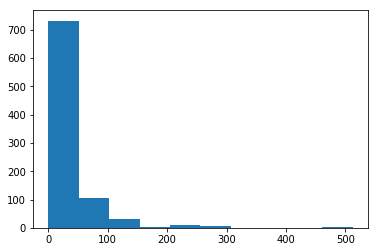

In [95]:
plt.hist(data_dict_columns['Fare'])

(array([ 678.,  118.,    0.,   80.,    0.,    5.,    4.,    0.,    5.,    1.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

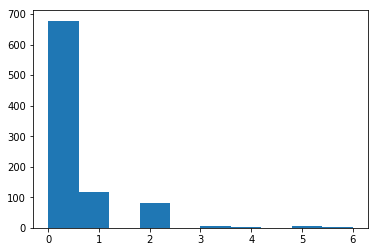

In [96]:
plt.hist(data_dict_columns['Parch'])

(array([ 608.,  209.,   28.,   16.,    0.,   18.,    5.,    0.,    0.,    7.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

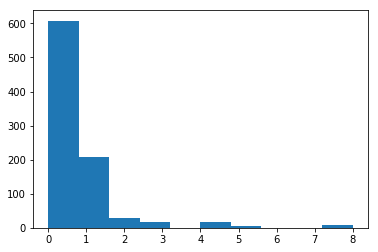

In [97]:
plt.hist(data_dict_columns['SibSp'])

(array([ 549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  342.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

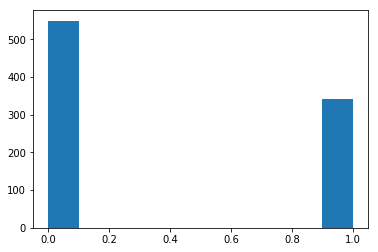

In [98]:
plt.hist(data_dict_columns['Survived'])

(array([ 216.,    0.,    0.,    0.,    0.,  184.,    0.,    0.,    0.,  491.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

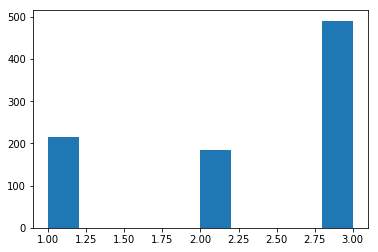

In [99]:
plt.hist(data_dict_columns['Pclass'])

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [100]:
from scipy import stats
import numpy as np
confidence_int_list = []

for i in numeric_cols:
    data_col = data_dict_columns[i]
    mean, std = np.mean(data_col), np.std(data_col)
    confidence_int = stats.norm.interval(0.90, loc=mean, scale=std)
    confidence_int_list.append(confidence_int)
print(confidence_int_list)
print(numeric_cols)

[(22.928213603444874, 869.0717863965549), (-0.4160857100118816, 1.1837624776886488), (0.93419910433719577, 3.6830848462800878), (nan, nan), (-1.2898255180672686, 2.3358412307496472), (-0.94350819849652856, 1.7066956283506247), (-49.488326497395349, 113.89674243454459)]
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


1. PassengerId can be ignored.
2. Survival rate varies between -0.4 and 1.18, which is an artifact of their categorical status. I kind of just like doing analysis of binary categorical variables, as it can be informative and cool.
3. Age is suffering from the nans that are inside of it which, tbh, I can't decide what to do with. I'll probably take them out before I write my sunday paper.
4. SibSp varies between -1.2 and 2.33, indicating a mean that's probably a bit higher in the 0-1 range, which makes sense. The high std is weird and due to people coming with either 6 siblings and 0 kids or 6 kids and 0 siblings or some combo in between.
5. Parch is between -0.9 and 1.7, which is a much neater ranger due to the lower amount of potential parents and partners in a monogamous society. :P
6. Fare varies heavily, due likely to aforementioned outliers but possibly just due to a block of people paying significantly more for more luxury.

# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [74]:
import pandas as pd

In [75]:
titanic_df = pd.read_csv('titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [76]:
print(titanic_df.head())
print(titanic_df.tail(4))
print(titanic_df.sample(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

In [77]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
pclass3_mask = titanic_df["Pclass"] == 3
maskedtitanic = titanic_df[pclass3_mask]
maskedtitanic["Survived"].mean()

0.24236252545824846

### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

In [79]:
titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [80]:
titanic_df["Age Range"] = pd.cut(titanic_df["Age"], range(0, 80, 5))
titanic_df.columns
titanic_df['Age Range'].head()

0    (20, 25]
1    (35, 40]
2    (25, 30]
3    (30, 35]
4    (30, 35]
Name: Age Range, dtype: category
Categories (15, object): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (55, 60] < (60, 65] < (65, 70] < (70, 75]]

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

$H_0$: There is no difference.

$H_1$: There is a difference.

### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

In [81]:
ttest = stats.ttest_ind

In [83]:
titanic_df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
survived = titanic_df['Survived'] == 1
didnot = titanic_df['Survived'] == 0
maskedtitanicexp = titanic_df[survived]
maskedtitaniccontrol = titanic_df[didnot]

ttest(maskedtitanicexp['Age'], maskedtitaniccontrol['Age'], nan_policy = 'omit')

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013483327)

The t-statistic is -2.066687, the p-value is 0.039. Because the latter is fairly low, I am inclined to say that there is a difference in age between those who survived and those who did not. I.e., those who survived tended to be younger by ~2 years, if I'm interpreting the t-statistic correctly.

# 15. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple?
2. Can you iterate over a dictionary? If so, how?
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`?
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived?


1. A list is alterable, a tuple isn't.
2. Make a list of the keys, iterate over the keys, iterate over the dictionary by inserting the keys into it.
3. A mask.
4. If the mean is significantly different from the median, the data is probably skewed. In such a case the median more accurately reflects the true center of the data and thus is a better statistic to use in your analysis, especially when applying standard deviation to it.
5. I would look at Female/Not, and Age. Women and children were allowed onto the life rafts more often, and older women and men would be more likely to die of cold. I can't actually give you a description based on the effects of my splits in the data because my code is too heavily looped to run for that section.

# 15. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?
2. What was difficult?
3. Where did you make the most improvement?
4. Where would you like to improve?

1. Generally speaking, I found the coding easy. I had previous experience and these problems weren't intellectually challenging, just repetitive until I purposely tried to make them tricky or elegant.
2. I guess just timing, mostly. I've always tended to procrastinate even though I always have good intentions. I occasionally got trouble from AWS. I found the problems difficult but that's because I intentionally chose harder versions of them.
3. I made the most improvement in my grasp of python, which I did not previously know.
4. I would like a better understanding of np, pd, and stats. 